**First Fundamental Theorem of Calculus:**

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} $$

**A rough corollary, which is useful numerically:**

$$\begin{align} f'(x) &\approx \frac{f(x+h) - f(x)}{h}, \\ \\
&\text{ for some $h$ that is ``small enough''}\end{align} $$

Let's try it out. First, in the next cell, we'll define three functions:
  1. `forward_numdiff`: our basic numerical differentiation function as .
  2. `demo_various_h_values`, which will make a graph for us to plot approximations for a series of increasingly small values of `h` against the true first derivative, which is supplied as an argument to the function.
  3. `side_by_side_numdiff_demos`, which will give us the ability to easily plot several demos for different functions side-by-side, with the inputs for each function supplied in a dictionary format. Works best for a maximum of 3 or 4 demos at a time.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def forward_firstderiv(f,x,h):
    return (f(x + h) - f(x))/h

def demo_various_h_values(f,fderiv,x,hstart,num_steps,numdiff_func,ax=None,show_at_end=False,title=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show_at_end = True
    ax.plot(x,fderiv(x),'k--',label='true first derivative')
    for j in range(num_steps):
        ax.plot(x,numdiff_func(f,
                                x,
                                hstart*2**(-j)
                               ),
                 'b-.',alpha=1.5**(-j),label=f'h = {hstart*2**(-j):.2f}'
                )
    ax.legend()
    if title is not None:
        ax.set_title(title)
    if show_at_end:
        plt.show()
    else:
        return ax

def side_by_side_numdiff_demos(dict_of_inputs,hstart,num_steps,
                               numdiff_func,
                               default_figsize=(5,4)
                              ):
    dict_keys = list(dict_of_inputs.keys())
    n_plots = len(dict_keys)
    f,ax = plt.subplots(1,n_plots,
                        figsize=(default_figsize[0]*n_plots,
                                 default_figsize[1])
                       )
    for j in range(n_plots):
        cur_example = dict_of_inputs[dict_keys[j]]
        demo_various_h_values(cur_example['f'],
                              cur_example['fprime'],
                              cur_example['x'],
                              hstart,num_steps,
                              numdiff_func,
                              ax=ax[j],
                              title=cur_example['title']
                             )
    plt.show()
        
    

In this next cell, we construct one example, for $f(x) = x^2$. It's a little bit boring, but it illustrates the essential point: the smaller $h$ gets, the closer the approximation.

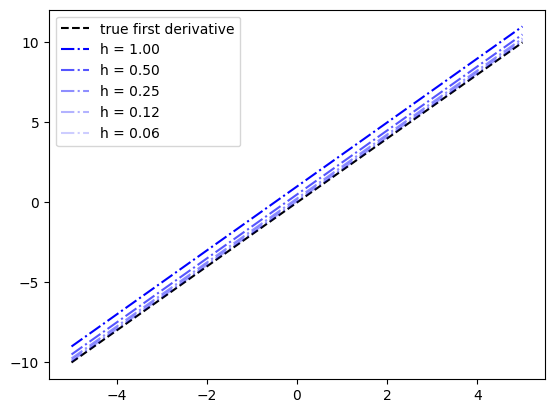

In [60]:
x = np.linspace(-5,5,1000)

f = lambda x: x**2

true_f_prime = lambda x: 2*x

demo_various_h_values(f,true_f_prime,x,1,5,forward_firstderiv)


In the cell below, we add two more examples: for a quartic polynomial, and for the natural logarithm. We can see that more complex functions may be more sensitive to the size of $h$, and that this sensitivity may be different for different values.

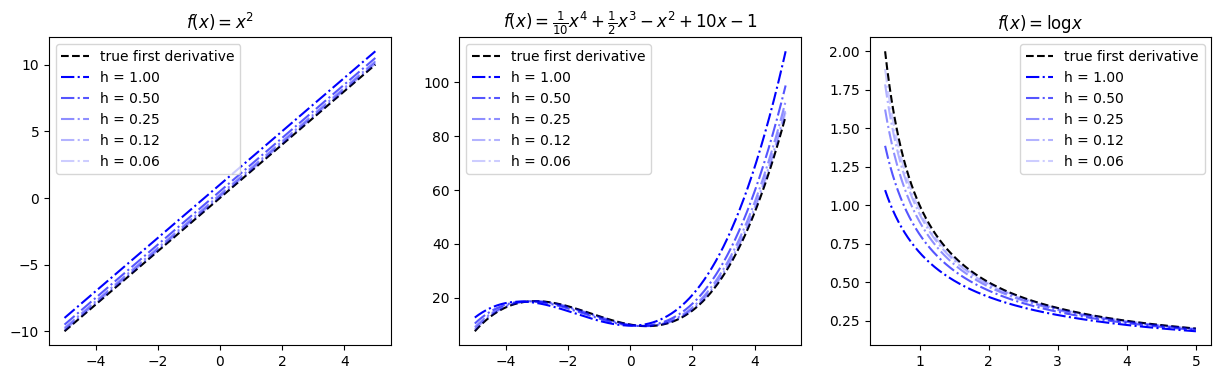

In [61]:
set_of_examples = {
    'x_squared': dict(
        x = np.linspace(-5,5,1000),
        f = lambda x: x**2,
        fprime = lambda x: 2*x,
        title = '$f(x) = x^2$'
    ),
    'x_polynom_4thdeg': dict(
        x = np.linspace(-5,5,1000),
        f = lambda x: .1*x**4 + .5*x**3 - x**2 + 10*x - 1,
        fprime = lambda x: .4*x**3 + 1.5*x**2 - 2*x + 10,
        title = '$f(x) = \\frac{1}{10} x^4 + \\frac{1}{2} x^3 - x^2 + 10 x - 1$'
    ),
    'log_x': dict(
        x = np.linspace(0.5,5,1000),
        f = lambda x: np.log(x),
        fprime = lambda x: 1/x,
        title = '$f(x) = \\text{log} x$'
    )
}

side_by_side_numdiff_demos(set_of_examples,1,5,forward_firstderiv)

### Numerical differentiation and Taylor expansion

We can gain more insight into what we're doing here by relating the finite difference formula to what we already know about Taylor expansions.

The Taylor expansion around $x$ for an arbitrary differentiable function $f(x+h)$ is given by:

$$\begin{align}f(x+h) &= f(x) + \frac{f'(x)}{1!}(x + h - x) + \frac{f''(x)}{2!}(x + h - x)^2 + \frac{f'''(x)}{3!}(x + h - x)^3 + \dots\\
&= f(x) + f'(x)h + \frac{f''(x)}{2!}h^2 + \frac{f'''(x)}{3!}h^3 + \dots
\end{align}$$

Rearranging, we get

$$ f'(x) = \frac{f(x+h) - f(x)}{h} + A, $$

where we've folded all the 2$^\text{nd}$- and higher-order stuff into $A$:

$$A = -\left(\frac{f''(x)}{2!}h  +\frac{f'''(x)}{3!}h^2 +\frac{f''''(x)}{4!}h^3 + \dots \right)$$

So, we can see that in addition to being strongly suggested by the First Fundamental Theorem of Calculus, the finite difference formula is also a kind of Taylor approximation. Its approximation error, therefore, will be proportional to the approximation error of the first-order Taylor approximation of $f(x)$.

### Other flavors of finite difference

What we've been working with so far is called the **forward** finite difference. If we consider a Taylor expansion around $x$ for $f(x-h)$ instead of $f(x+h)$, we directly get the **backward** finite difference formula:

$$ f(x) \approx \frac{f(x) - f(x-h)}{h}$$

If we put $\frac{1}{2}$ weight on each of the forward and the backward differences, and add them together, we get the **centered** difference formula:

$$ f(x) \approx \frac{f(x+h) - f(x-h)}{2h},$$

also often given as the equivalent:

$$ f(x) \approx \frac{f\left(x+\frac{h}{2}\right) - f\left(x-\frac{h}{2}\right)}{h},$$

Let's have a look at each of these in action. First, the backward difference:

C:\Users\MDelventhal\AppData\Local\Temp\ipykernel_24088\3775263105.py:16: RuntimeWarning: divide by zero encountered in log
  f = lambda x: np.log(x),
C:\Users\MDelventhal\AppData\Local\Temp\ipykernel_24088\3775263105.py:16: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(x),


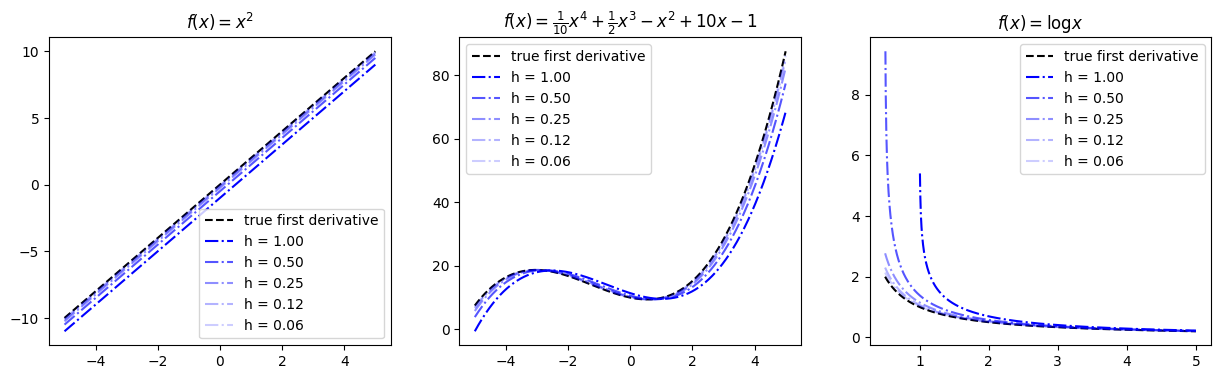

In [65]:
def backward_firstderiv(f,x,h):
    return (-f(x - h) + f(x))/h

side_by_side_numdiff_demos(set_of_examples,1,5,backward_firstderiv)



For many functions, especially polynomials, the errors of the backward difference look very similar to those of the forward difference, just reversed.

Now, let's look at the centered difference:

C:\Users\MDelventhal\AppData\Local\Temp\ipykernel_24088\3775263105.py:16: RuntimeWarning: divide by zero encountered in log
  f = lambda x: np.log(x),
C:\Users\MDelventhal\AppData\Local\Temp\ipykernel_24088\3775263105.py:16: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(x),


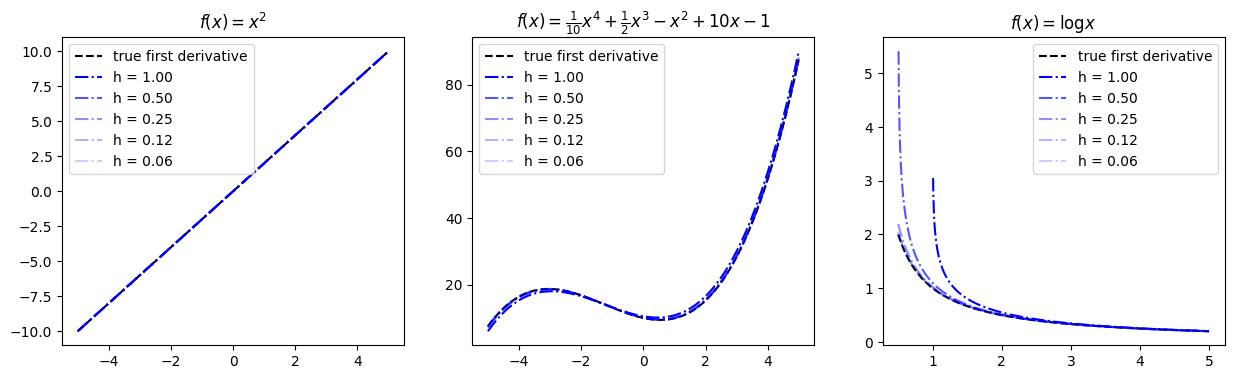

In [79]:
def centered_firstderiv(f,x,h):
    return (f(x + h) - f(x-h))/(2*h)

side_by_side_numdiff_demos(set_of_examples,1,5,centered_firstderiv)

For the quadratic polynomial, the errors of the forward and backward differences perfectly cancel each other out so that the centered difference approximation is exact.

For higher-order polynomials and other functions, the errors are generally much smaller than with either of the other methods, though still not zero.

### Quick exercise for finite differences:

 - Set up a set of 3 functions different from the ones we've test so far, and try them out with one or more of the finite difference formulas.

### Second derivatives with finite differences

The quickest, easiest, and most flexible way to compute a second or higher-order derivative is simply to stack first order approximations on top of each other.

There are more precise formulas which you can find in textbooks and on the internet, which are based on further careful derivations from the Taylor expansion. In this quick lesson, we will not cover any of those.

We will derive a simplified second derivative formula for the forward difference, and show the result in the cell below:

 $$\begin{align}f'(x) &= \frac{f(x+h) - f(x)}{h}\\
 \iff\\
 f''(x) &= \frac{f'(x+h) - f'(x)}{h}\\
 &= \frac{1}{h} \left [\frac{f(x + h + h) - f(x+h)}{h} - \frac{f(x+h) - f(x)}{h}  \right ]\\
 &= \frac{f(x + 2h) - 2 f(x+h) + f(x))}{h^2}
 \end{align}$$

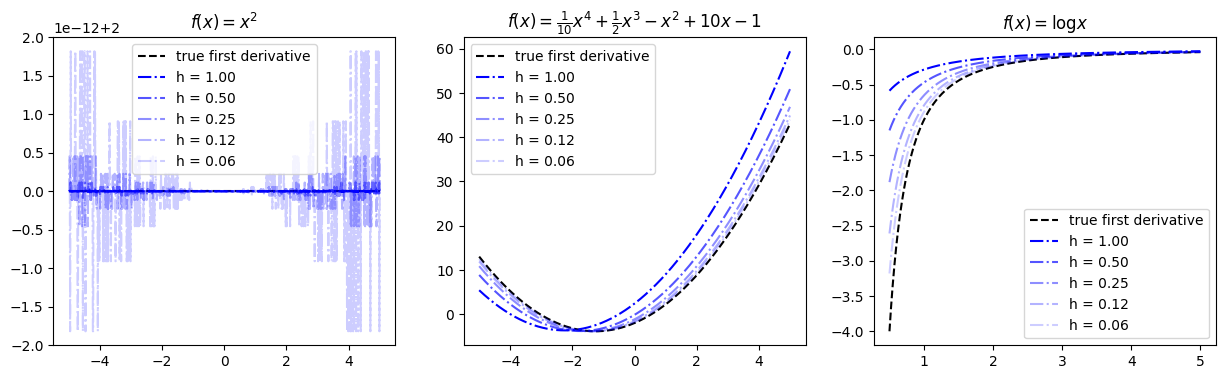

In [105]:
def forward_secondderiv(f,x,h):
    return (f(x + 2*h) + f(x) - 2*f(x+h))/(h**2)

set_of_examples = {
    'x_squared': dict(
        x = np.linspace(-5,5,1000),
        f = lambda x: x**2,
        fprime = lambda x: np.ones(len(x))*2,
        title = '$f(x) = x^2$'
    ),
    'x_polynom_4thdeg': dict(
        x = np.linspace(-5,5,1000),
        f = lambda x: .1*x**4 + .5*x**3 - x**2 + 10*x - 1,
        fprime = lambda x: 1.2*x**2 + 3*x - 2,
        title = '$f(x) = \\frac{1}{10} x^4 + \\frac{1}{2} x^3 - x^2 + 10 x - 1$'
    ),
    'log_x': dict(
        x = np.linspace(0.5,5,1000),
        f = lambda x: np.log(x),
        fprime = lambda x: -1/(x**2),
        title = '$f(x) = \\text{log} x$'
    )
}

side_by_side_numdiff_demos(set_of_examples,1,5,forward_secondderiv)



### Quick exercise for second derivatives

 - Write a function that computes the second derivative by feeding the first derivative into itself. Check that it yields a similar result to the function above, defined based on the analytical formula. Are the two results exactly the same?